# DEBUG: Dataset for Event-Based Unadorned Geometries

In [77]:
import h5py
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import tqdm

In [78]:
!find ../ -name "*.h5"

../.venv/lib/python3.10/site-packages/h5py/tests/data_files/vlen_string_s390x.h5
../.venv/lib/python3.10/site-packages/h5py/tests/data_files/vlen_string_dset_utc.h5
../.venv/lib/python3.10/site-packages/h5py/tests/data_files/vlen_string_dset.h5
../basic_shapes/triangle/shear/2024_02_04_21_41_21_triagle_none_shear_left_processed/frames.h5
../basic_shapes/triangle/shear/2024_02_04_21_47_02_triagle_none_shear_left_processed/frames.h5
../basic_shapes/triangle/shear/2024_02_04_21_53_21_triagle_none_shear_right_processed/frames.h5
../basic_shapes/triangle/shear/2024_02_04_21_56_01_triagle_none_shear_right_processed/frames.h5
../basic_shapes/triangle/rotation/2024_02_04_20_18_40_triagle_none_rot_left_processed/frames.h5
../basic_shapes/triangle/rotation/2024_02_04_20_21_45_triagle_none_rot_left_processed/frames.h5
../basic_shapes/triangle/rotation/2024_02_04_20_26_56_triagle_none_rot_right_processed/frames.h5
../basic_shapes/triangle/rotation/2024_02_04_20_30_29_triagle_none_rot_right_process

In [60]:
!ls ../basic_shapes/triangle/shear/2024_02_04_21_47_02_triagle_none_shear_left_processed

events.aedat4  frames.h5  metadata.txt	positions.json


In [79]:
file_rec = "../basic_shapes/triangle/shear/2024_02_04_21_47_02_triagle_none_shear_left_processed/frames.h5"
#file_rec = "frames.h5"
# "../basic_shapes/triangle/affine/2024_02_04_21_13_14_triagle_none_affine_right_processed/frames.h5"

In [80]:
with h5py.File(file_rec) as f:
    co = f["frame_keys"][:]
    val = torch.from_numpy(f["frame_values"][:]).int()

In [81]:
to_list = lambda x: np.array([x[i] for i in range(4)])

In [82]:
# coos = np.vectorize(to_list, signature="()->(4)")(co)
coos = []
for i in tqdm.tqdm(co[-1000000:]):
    coos.append(to_list(i))

100%|██| 1000000/1000000 [00:02<00:00, 440837.19it/s]


In [65]:
coos = torch.from_numpy(np.array(coos, dtype=np.int64))

In [66]:
sp = torch.sparse_coo_tensor(coos.T, val[-1000000:])
coos.shape, val[-1000000:].shape

(torch.Size([1000000, 4]), torch.Size([1000000]))

In [25]:
def save_video_from_events(events, filename, fps=30):
    """
    Save a video from a sparse tensor of events
    """
    # Ensure the tensor is on the CPU and convert to numpy array
    frames = tensor.cpu().numpy()

    # Ensure the frames are in uint8 format
    if frames.dtype != np.uint8:
        frames = (frames * 255).astype(np.uint8)

    # Create a video writer
    writer = imageio.get_writer(filename, fps=fps, codec='ffv1')

    # Write each frame to the video
    for frame in frames:
        writer.append_data(frame)

    # Close the writer
    writer.close()

In [ ]:
video.max()

In [29]:
def write_sparse_to_file(frames):
    f = []
    for i in tqdm.trange(count):
        f.append(frames[i + start].to_dense().clip(0, 1))
    f = torch.stack(f) * 255
    zeros = torch.zeros(len(f), 1, *f.shape[2:])
    return torch.concat([f, zeros], dim=1).permute(0, 3, 2, 1)

video = to_frames(sp, 88014 - 100, 100)

100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 66.31it/s]


In [24]:
save_video_from_tensor(video, "frames

<video src="vid.mp4" autoplay loop controls/>

# Draw masks

In [40]:
import math
import scipy
import cv2
triangle_offset =  -0;
triangle_width = 0.29;
triangle_height =  triangle_width / 2 * math.tan(60 * math.pi / 180);
triangle_center = triangle_width * math.sqrt(3) / 3;
triangle_polygon = [
        [-(triangle_center), 0, 0],
        [triangle_height - triangle_center, 0, -triangle_width / 2],
        [triangle_height - triangle_center, 0, triangle_width / 2],
        [-(triangle_center), 0, 0]
]
circle_radius = 0.292/2;
iterations = 150;
circle_polygon = []
for i in range(iterations):
    circle_polygon.append([
        math.sin(2 * math.pi * i / iterations) * circle_radius, 
        0,
        math.cos(2 * math.pi * i / iterations) * circle_radius,
    ]);

    
offset_x = 0.28 / 2 - 0.022154 - 0.05;
offset_z = 0.22 / 2 + 0.1 + 0.05;
blob_polygon = [
    [offset_x, 0, offset_z],
    [offset_x + 0.022154, 0, offset_z],
    [offset_x + 0.022154, 0, offset_z - 0.1],
    [offset_x + 0.022154 + 0.05, 0, offset_z - 0.05 - 0.1],
    [offset_x + 0.022154 + 0.05, 0, offset_z - 0.05 - 0.1 - 0.22],
    [offset_x + 0.022154 + 0.05 - 0.28, 0, offset_z - 0.05 - 0.1 - 0.22],
    [offset_x + 0.022154 + 0.05 - 0.28, 0, offset_z - 0.05 - 0.1 - 0.22 + 0.25],
    [offset_x, 0, offset_z],
]

In [70]:
with h5py.File(file_rec) as f:
    poses = f["triangle"][:]
poses.shape

(153290, 9)

In [71]:
poses.shape, video.shape

((153290, 9), torch.Size([100, 720, 1280, 3]))

In [72]:
poses[0]

array([ 6.4772778e+02,  3.6169006e+02, -3.3050135e-03, -1.0312347e-01,
       -2.2988939e+00, -2.4425484e-01, -1.4966837e-01,  7.1686226e-01,
       -6.3564724e-01], dtype=float32)

In [73]:
camera_matrix = np.array([[1700.74372, 0, 650.172869],
                 [0, 1700.74372, 285.398327],
                 [0, 0, 1]])
vec = np.array([0, 0, 0], dtype=np.float32)
distortion_coeff = np.array([0, 0, 0, 0, 0], dtype=np.float32)

In [74]:
def position_to_pixel(points, pose):
    (px, py, cx, cy, cz, qx, qy, qz, qw) = pose
    print(px, py, cx, cy, cz)
    rotation = scipy.spatial.transform.Rotation.from_quat([qx, qy, qz, qw])
    new_points = [[p[0], -p[1], -p[2]] for p in points] # Convert to opencv
    rotated_points = rotation.apply(new_points)
    relative_points = rotated_points + np.array([cx, -cy, -cz]) # Convert to opencv
    projected_points, _ = cv2.projectPoints(relative_points, vec, vec, camera_matrix, distortion_coeff)
    cx = camera_matrix[0, 2]
    cy = camera_matrix[1, 2]
    return projected_points# - np.array([x, 0])
    #return projected_points - np.array([cx, cy])) * np.array([-1, 1]) + np.array([cx, cy])
    #return (projected_points - np.array([cx, cy])) * np.array([-1, 1]) + np.array([x, y])

position_to_pixel([[0, 0, 0]], poses[0])

647.7278 361.69006 -0.0033050135 -0.10312347 -2.298894


array([[[647.72778838, 361.69005745]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


644.0144 362.65622 -0.008325759 -0.10444695 -2.2992797
644.0144 362.65622 -0.008325759 -0.10444695 -2.2992797


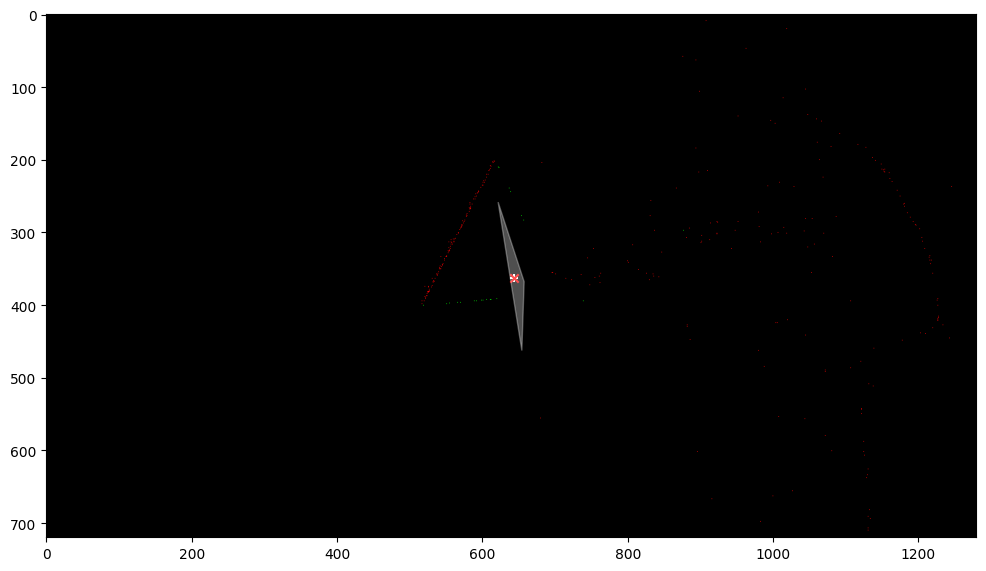

In [83]:
def draw_frame(frame, pose, polygon):
    f, a = plt.subplots(1, 1, figsize=(12, 7))
    a.imshow(frame)
    plt.scatter([pose[0]], [pose[1]], marker="+", color="white")
    center = position_to_pixel([[0,0,0]], pose).reshape(-1, 2)
    plt.scatter([center[0,0]], [center[0,1]], marker="x", color="red")
    pixels = position_to_pixel(polygon, pose).reshape(-1, 2)
    plt_polygon = plt.Polygon(pixels, color="#ffffff50")
    a.add_patch(plt_polygon)

n = 70
draw_frame(video[n + 8], poses[n], triangle_polygon)

# Test hdf5 layout

In [ ]:
!ls -alh test.hdf5

In [19]:
with h5py.File("test.hdf5", "w") as f:
    for i in tqdm.trange(100000):
        arr = np.empty((4, 100000), dtype=np.uint8)
        f.create_dataset(str(i), data=arr)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [01:28<00:00, 1128.61it/s]


In [2]:
%%timeit
n = torch.randint(0, 10000, (1,)).item()
with h5py.File("test.hdf5", "r") as f:
    coos = f[f"{n}"][:]
    t = torch.sparse_coo_tensor(indices=coos, values=torch.ones(len(coos[0])), dtype=torch.int8)
t.shape

2.66 ms ± 55.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%%timeit
n = torch.randint(0, 10000, (1,)).item()
with h5py.File("test.hdf5", "r") as f:
    coos = torch.from_numpy(f[f"{n}"][:]).cuda()
    t = torch.sparse_coo_tensor(indices=coos, values=torch.ones(len(coos[0]), device="cuda"), dtype=torch.int8, device="cuda").to_dense()
t.shape

253 ms ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit
n = torch.randint(0, 10000, (1,)).item()
with h5py.File("test.hdf5", "r") as f:
    coos = f[f"{n}"][:]
    t = torch.sparse_coo_tensor(indices=coos, values=torch.ones(len(coos[0])), dtype=torch.int8).to_dense().cuda()
t.shape

28.8 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Test AEStream

In [ ]:
!ls ../basic_shapes/triangle/affine/2024_02_04_21_13_14_triagle_none_affine_right_processed/

In [ ]:
import time
with aestream.FileInput("../basic_shapes/triangle/affine/2024_02_04_21_13_14_triagle_none_affine_right_processed/events.aedat4", (1280, 720)) as fp:
    fp.read()
    time.sleep(2)
    print(fp.read().sum())